# Machine Learning Assignment: Classification Task

# 1. Problem Definition
# Business or Research Problem:
Predict whether a student will be admitted to a university based on their academic performance and test scores.
# Goal:
The goal is classification: to predict admission status (1 = Admitted, 0 = Not Admitted).
# Success Criteria:
**Accuracy:** Target a high accuracy (e.g., >80%).

**Precision and Recall:** Ensure good balance to avoid false positives and false negatives.

**F1-Score:** Achieve a robust harmonic mean of precision and recall.

# 2. Data Collection
# Data Source:
Dataset: [Student Admission Records](https://www.kaggle.com/datasets/zeeshier/student-admission-records)

# Data Description:
**Features:**
Name,	Age,	Gender,	Admission Test Score,	High School Percentage,	City,	Admission Status

**Target:** Admission (1 = Admitted, 0 = Not Admitted)

**Data Representation:**
The dataset contains sufficient attributes to represent the domain effectively.


# 3. Data Exploration and Preparation
# Exploratory Data Analysis (EDA):

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
data = pd.read_csv('student_admission_record_dirty.csv')

Exploratory Data Analysis and Cleaning

In [40]:
data.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,0.980075,0,-1.727830,-0.378191,5,1
1,Waqar,0.305711,0,1.308718,-0.864393,1,1
2,Bushra,-0.593440,1,0.689014,0.025572,0,0
3,Aliya,-0.593440,1,-1.417978,0.597189,1,1
4,Bilal,0.080924,1,-0.798274,-0.840589,2,1


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    150 non-null    object 
 1   Age                     150 non-null    float64
 2   Gender                  150 non-null    int64  
 3   Admission Test Score    150 non-null    float64
 4   High School Percentage  150 non-null    float64
 5   City                    150 non-null    int64  
 6   Admission Status        150 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 9.4+ KB


In [42]:
data.describe()

,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
count,1.500000e+02,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000
mean,-1.065814e-16,0.393333,2.368476e-16,3.019807e-16,3.153333,0.553333
std,1.003350e+00,0.490126,1.003350e+00,1.003350e+00,1.985642,0.498813
min,-4.639620e+00,0.000000,-5.136200e+00,-5.073582e+00,0.000000,0.000000
25%,-3.686520e-01,0.000000,-4.264523e-01,-5.623765e-01,1.000000,0.000000
50%,8.092360e-02,0.000000,7.340234e-03,2.557249e-02,3.000000,1.000000
75%,5.304992e-01,1.000000,6.890142e-01,6.967203e-01,5.000000,1.000000
max,9.800748e-01,1.000000,4.469206e+00,2.097452e+00,6.000000,1.000000


Visualizations

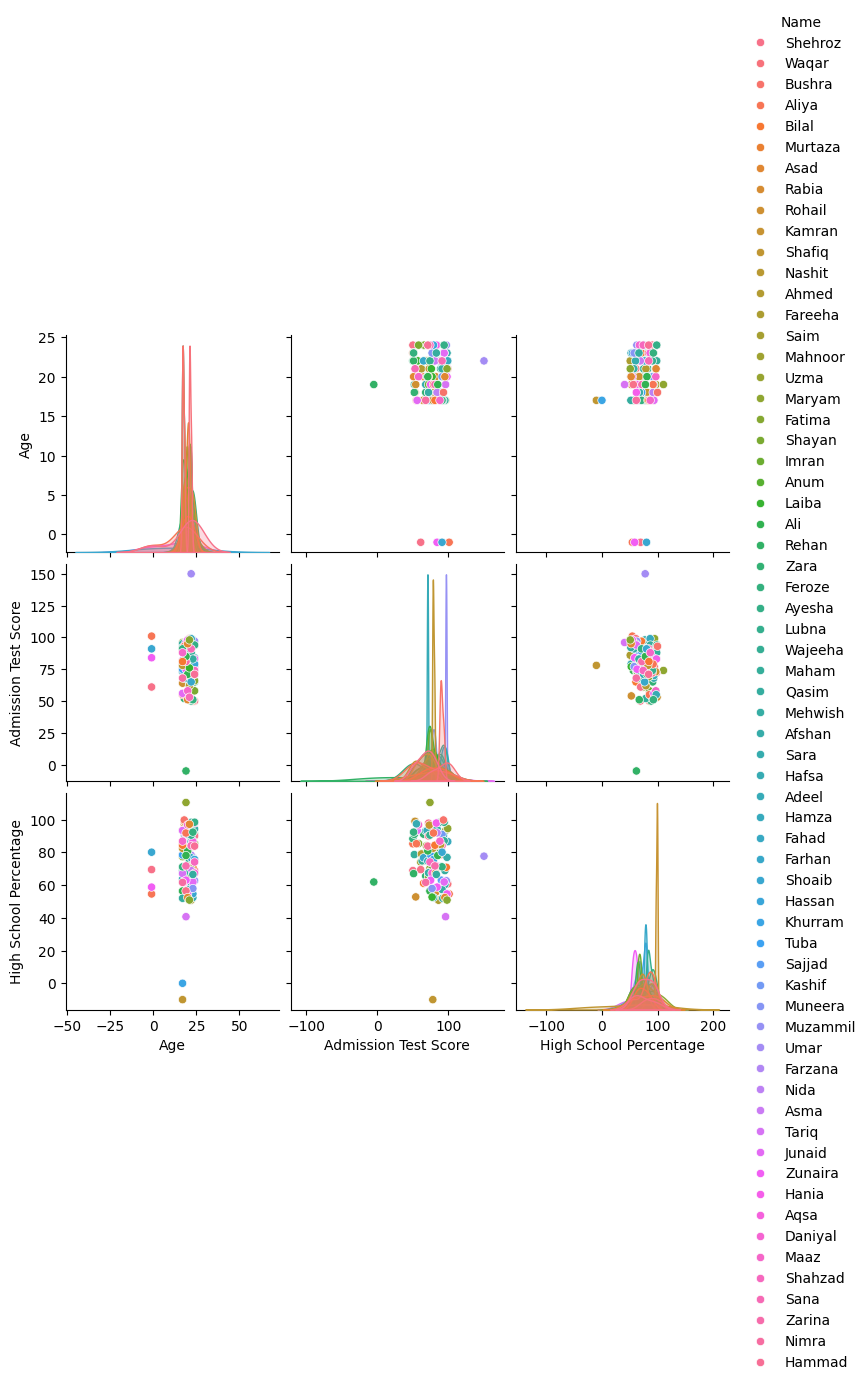

In [ ]:
sns.pairplot(data, hue='Name')
plt.show()

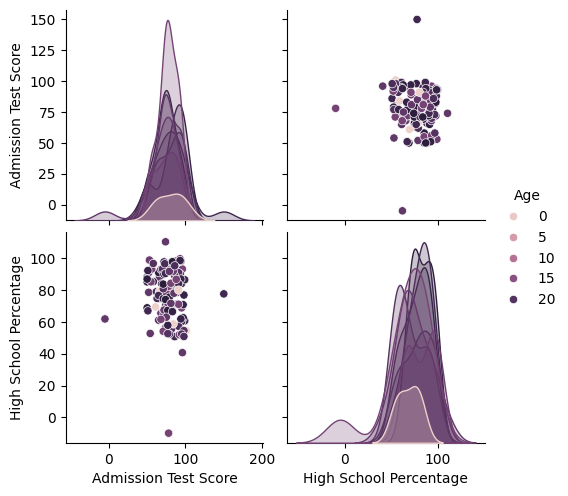

In [ ]:
sns.pairplot(data, hue='Age')
plt.show()

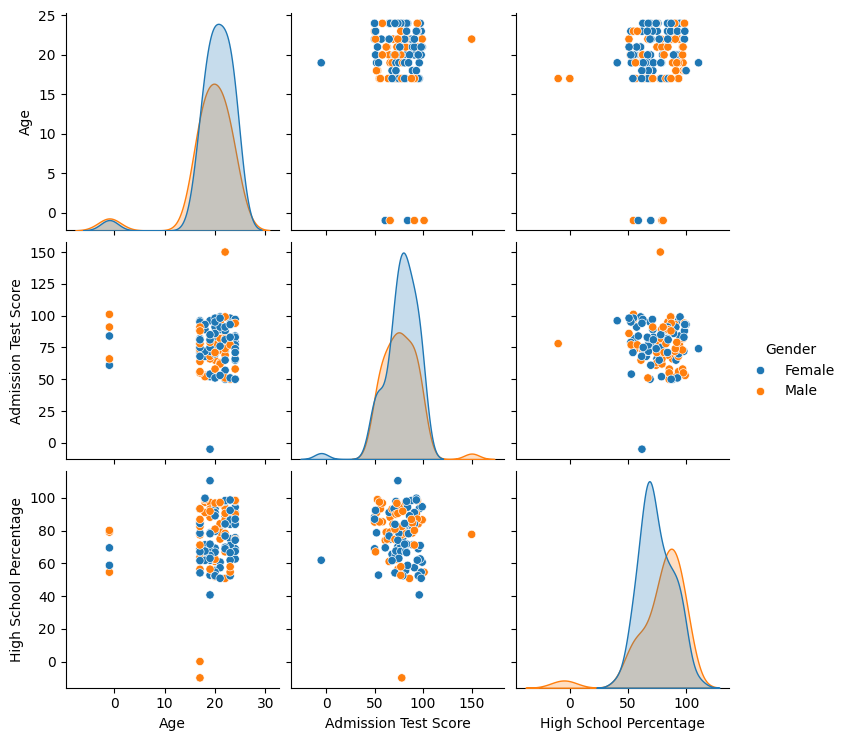

In [ ]:
sns.pairplot(data, hue='Gender')
plt.show()

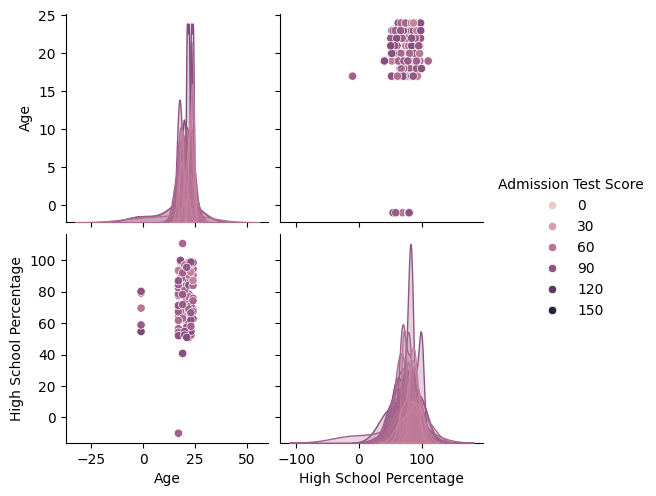

In [ ]:
sns.pairplot(data, hue='Admission Test Score')
plt.show()

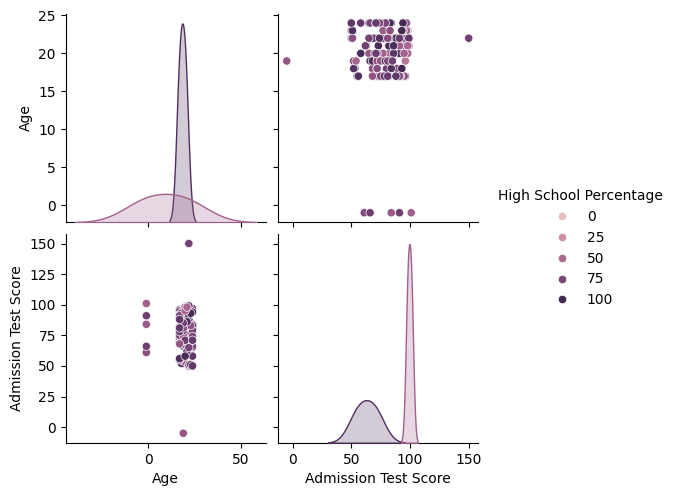

In [ ]:
sns.pairplot(data, hue='High School Percentage')
plt.show()

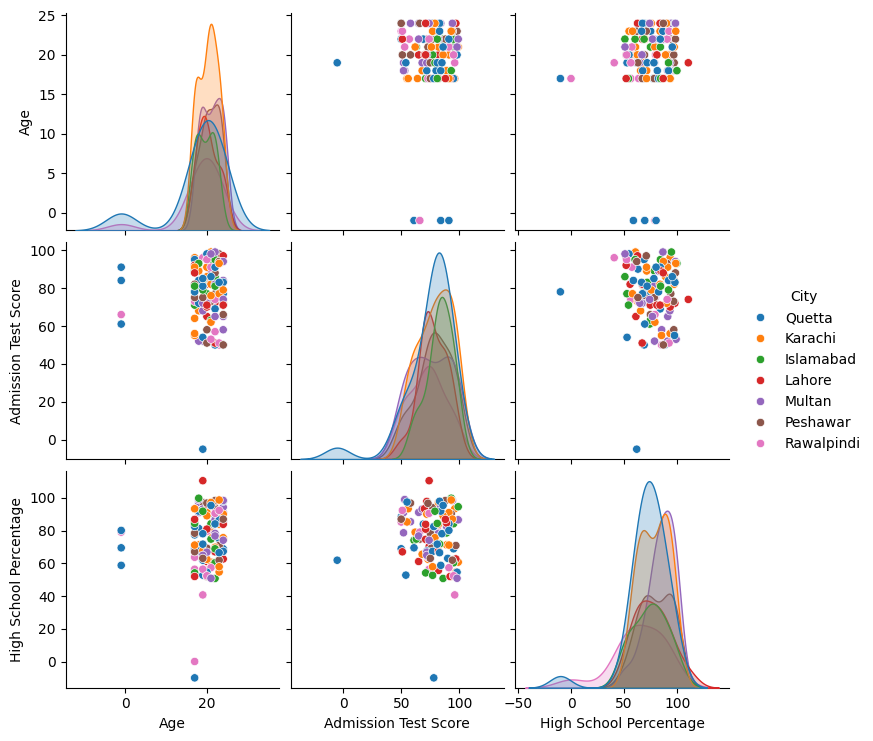

In [ ]:
sns.pairplot(data, hue='City')
plt.show()

# Data Cleaning

In [20]:
# Check for missing values
print(data.isnull().sum())

Name                      10
Age                       10
Gender                    10
Admission Test Score      11
High School Percentage    11
City                      10
Admission Status          10
dtype: int64


In [23]:
# Fill missing numerical values with the mean
data['Admission Test Score'] = data['Admission Test Score'].fillna(data['Admission Test Score'].mean())
data['High School Percentage'] = data['High School Percentage'].fillna(data['High School Percentage'].mean())
data['Age'] = data['Age'].fillna(int(data['Age'].mean()))

# Fill missing categorical values with the mode
data['City'] = data['City'].fillna(data['City'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Admission Status'] = data['Admission Status'].fillna(data['Admission Status'].mode()[0])

# Fill missing text data with a placeholder
data['Name'] = data['Name'].fillna('Unknown')


In [24]:
print(data.isnull().sum())

Name                      0
Age                       0
Gender                    0
Admission Test Score      0
High School Percentage    0
City                      0
Admission Status          0
dtype: int64


In [25]:
# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 7


In [26]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [27]:
# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


# Feature Engineering

In [43]:
# Convert categorical variables to numerical values using Label Encoding
categorical_columns = ['City', 'Gender', 'Admission Status']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Verify encoding
data.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,0.980075,0,-1.727830,-0.378191,5,1
1,Waqar,0.305711,0,1.308718,-0.864393,1,1
2,Bushra,-0.593440,1,0.689014,0.025572,0,0
3,Aliya,-0.593440,1,-1.417978,0.597189,1,1
4,Bilal,0.080924,1,-0.798274,-0.840589,2,1


In [44]:
# Identify numerical columns
numerical_columns = ['Admission Test Score', 'High School Percentage', 'Age']

# Apply StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verify scaling
data.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,0.980075,0,-1.727830,-0.378191,5,1
1,Waqar,0.305711,0,1.308718,-0.864393,1,1
2,Bushra,-0.593440,1,0.689014,0.025572,0,0
3,Aliya,-0.593440,1,-1.417978,0.597189,1,1
4,Bilal,0.080924,1,-0.798274,-0.840589,2,1


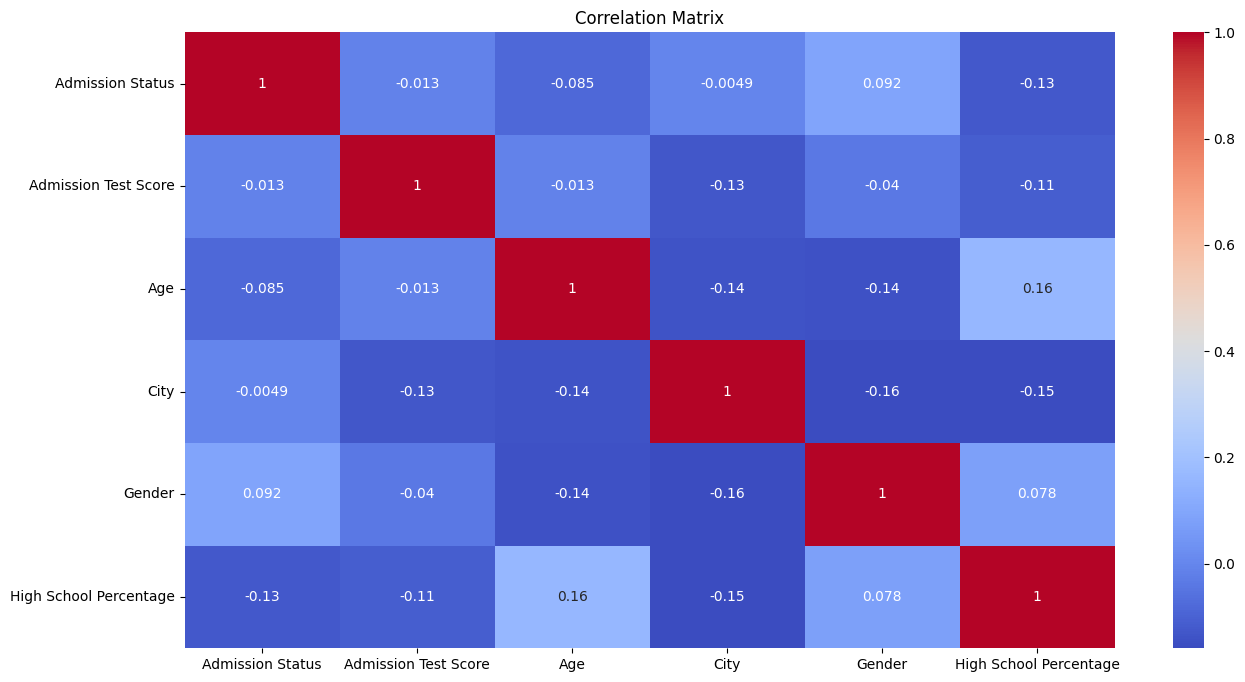

In [52]:
plt.figure(figsize=(15, 8))
sns.heatmap(data[['Admission Status', 'Admission Test Score', 'Age', 'City', 'Gender', 'High School Percentage']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Splitting

In [32]:
# Define features (X) and target (y)
X = data.drop(['Admission Status', 'Name'], axis=1)  # Drop target and irrelevant columns
y = data['Admission Status']  # Target variable

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (120, 5)
Testing set size: (30, 5)


# 4. Algorithm Selection
# Chosen Model:
**Logistic Regression** for simplicity and interpretability.

**Considerations:**
Logistic Regression: Easy to interpret and computationally efficient.


# 5. Model Development and Training
**Model Design:**
Logistic Regression with sklearn.

**Training:**
Use train_test_split for splitting.
Fit models on the training set using default hyperparameters initially.


In [34]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.54
Testing Accuracy: 0.47


              precision    recall  f1-score   support

           0       0.33      0.23      0.27        13
           1       0.52      0.65      0.58        17

    accuracy                           0.47        30
   macro avg       0.43      0.44      0.43        30
weighted avg       0.44      0.47      0.45        30



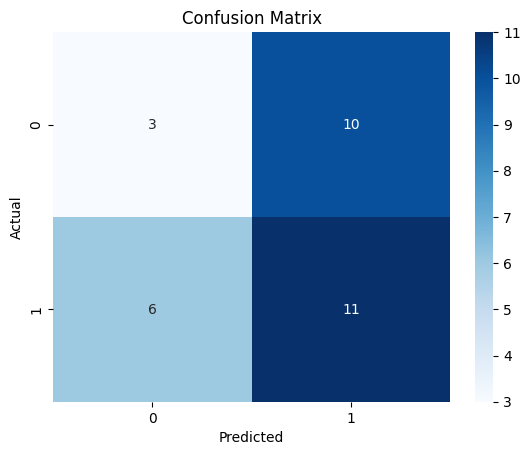

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearch
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'C': 0.1, 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.44


In [37]:
# Save preprocessed data
data.to_csv('preprocessed_student_data.csv', index=False)

In [53]:
# Save the trained model
joblib.dump(model, 'student_admission_model.pkl')

['student_admission_model.pkl']

In [60]:
# Load and use the model for classification
loaded_model = joblib.load('student_admission_model.pkl')
sample_data = X_test.iloc[0:1]
print("Sample Classification:", loaded_model.predict(sample_data))

Sample Classification: [1]
